# <font color="red"><p align="center">📌 Descriptive Statistical Analysis</p></font>

#### ✅ Step 1: Import All Necessary Libraries

In [1]:
import pandas as pd         
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns  
import math    
from scipy.stats import chi2_contingency  
from wordcloud import WordCloud  
from textblob import TextBlob
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

#### ✅ Step 2: Load The Dataset & Basic Analysis 

2.1: Load the dataset

In [2]:
file_path = "Final Dataset.xlsx"
df = pd.read_excel(file_path)

2.2: Info of the dataset

In [3]:
# df.info()

2.3: Head of the dataset

In [4]:
pd.set_option('display.max_columns', None)  # for showing all columns
pd.set_option('display.expand_frame_repr', False)  # this prevent wrapping to new lines
print(df.head())

  Age_Range  Gender Occupation    Hometown Aware_Shutdown Internet_Usage_BS Internet_Reliance_BS IS_Affect_Daily_Routine Change_Digital_Dependency Reconsider_Offline_Alternatives Justify_Shutdown_in_Certain_Situation S_Limit_Freedom_of_Speech Shutdown_Effectiveness_in_GIP Future_Acceptance_of_S_for_NS Protest_Hindrance_AG Future_Civic_Engagement_if_ASO     ISLAC_Protest_CM Primary_Communication_Mode_BS Comm_Disruption_due_to_S Social_Media_Usage_Change_AS Switch_Alt_Comm_Methods_DS News_Reliance_on_Internet_BS Mental_Impact_of_S                               Coping_Strategy_DS     Lasting_Impact_on_MH        CORS_on_National_Stability          Democracy_Perception_if_SDOA ISR_in_GPC_in_Bang
0     18-29  Female    Student  Chattogram            Yes         2-4 hours             A little                      No                 No change                              No                               Neutral                Not at all                       Neutral                       Neutr

2.4: Check for missing values in the dataset

In [5]:
missing_values = df.isnull().sum()
missing_values[missing_values> 0] # Display missing values only if they exist

Series([], dtype: int64)

2.5: Check for duplicate values in the dataset

In [6]:
has_duplicates = df.duplicated().any()
print(f"Are there any duplicate rows? {has_duplicates}")

Are there any duplicate rows? True


In [7]:
num_duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")
duplicate_rows = df[df.duplicated()]
# print(duplicate_rows)

Number of duplicate rows: 23


In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df.shape

(1267, 28)

In [10]:
df['Hometown'].value_counts(normalize=True) * 100  # percentage

Hometown
Chattogram    69.455406
Dhaka         12.628256
Mymensingh     4.656669
Rangpur        3.235991
Rajshahi       3.235991
Sylhet         2.999211
Khulna         2.604578
Barishal       1.183899
Name: proportion, dtype: float64

In [11]:
df.shape

(1267, 28)

In [12]:
# Current counts (for reference)
print(df['Hometown'].value_counts())

# Target counts
target_counts = {
    'Chattogram': 177,
    'Dhaka': 155,
    'Mymensingh': 140,
    'Rangpur': 153,
    'Rajshahi': 158,
    'Sylhet': 158,
    'Khulna': 159,
    'Barishal': 167
}

# Shuffle dataframe to randomize the rows (optional but recommended)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 1: create a list of all indices
all_indices = df.index.tolist()

# Step 2: create a new empty column for balanced hometown
balanced_hometown = []

# Step 3: assign values according to target counts
for hometown, count in target_counts.items():
    balanced_hometown.extend([hometown] * count)

# Step 4: make sure length matches the dataframe length
assert len(balanced_hometown) == len(df), "Counts do not sum up to total rows!"

# Step 5: assign balanced hometown values back to df
df['Hometown'] = balanced_hometown

# Step 6: check new counts
print(df['Hometown'].value_counts())

Hometown
Chattogram    880
Dhaka         160
Mymensingh     59
Rangpur        41
Rajshahi       41
Sylhet         38
Khulna         33
Barishal       15
Name: count, dtype: int64
Hometown
Chattogram    177
Barishal      167
Khulna        159
Sylhet        158
Rajshahi      158
Dhaka         155
Rangpur       153
Mymensingh    140
Name: count, dtype: int64


#### ✅ Step 3: Visualizing The Distribution Of Categorical Features Using Bar Charts

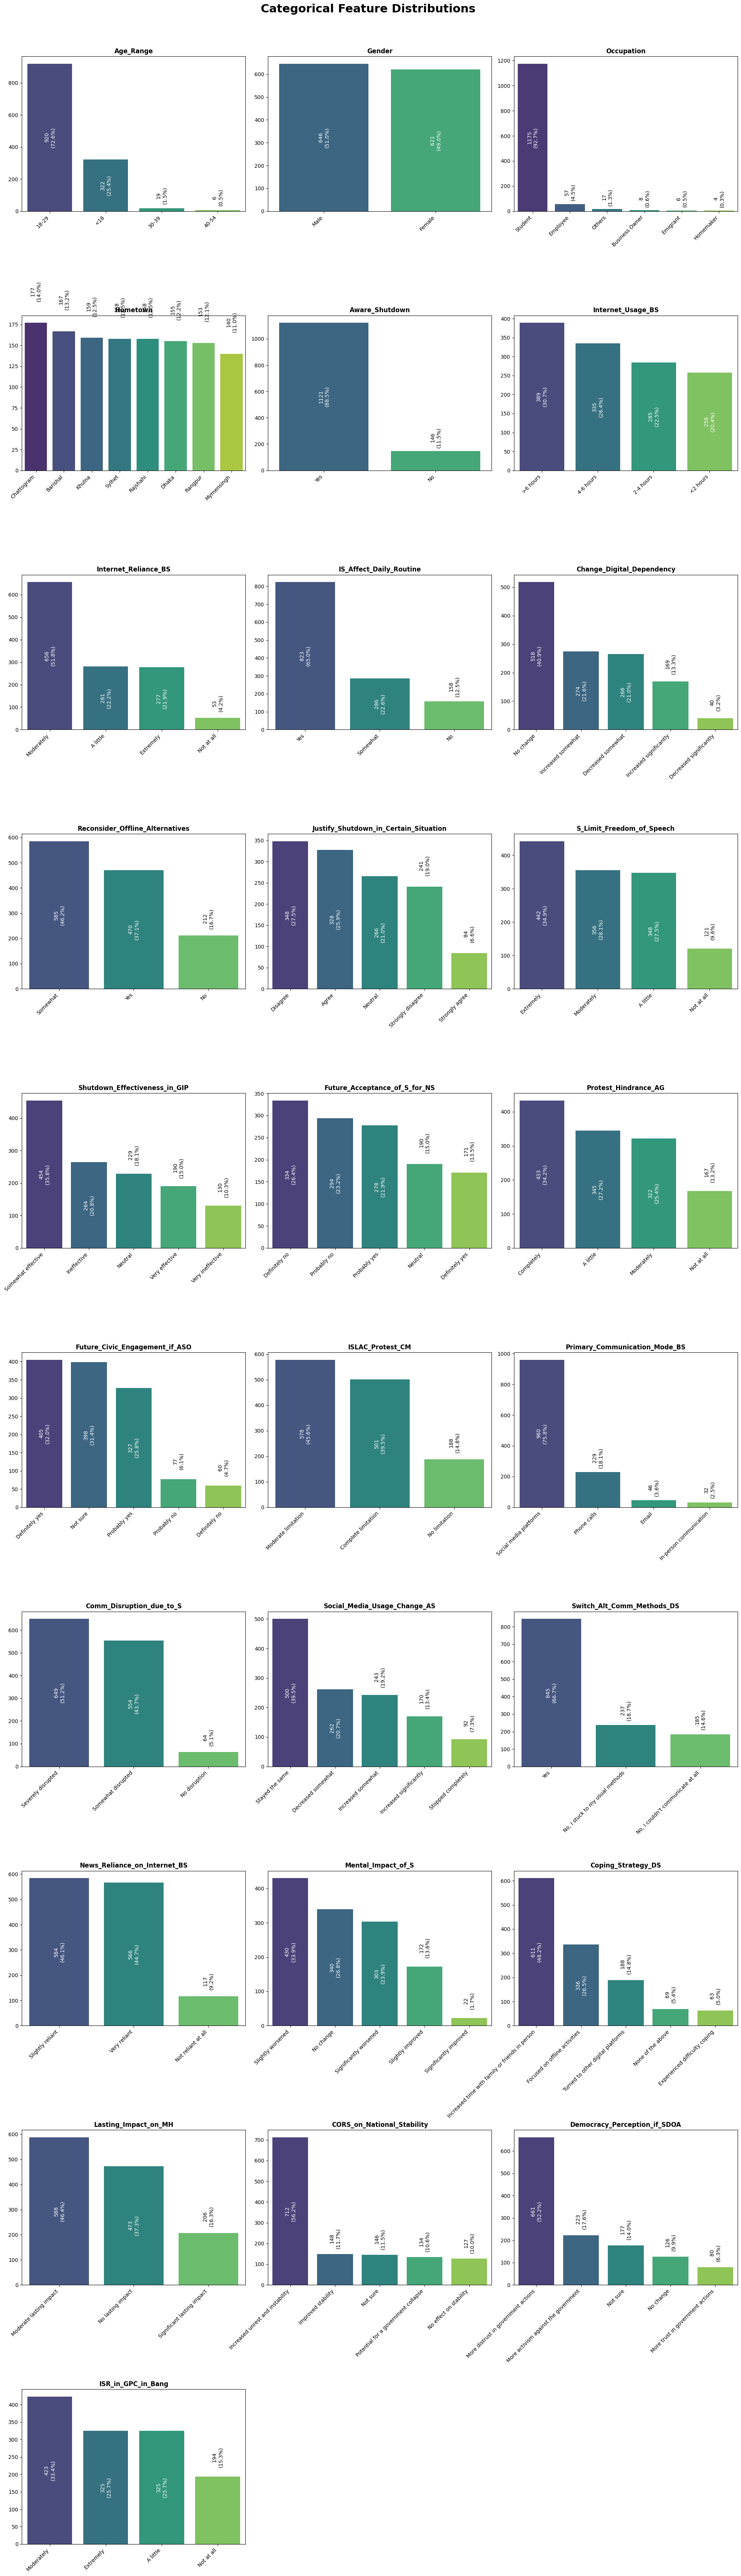

In [13]:
categorical_columns = df.columns  

# Define number of rows and columns for subplots
num_features = len(categorical_columns)
num_cols = 3  # Set number of columns per row
num_rows = math.ceil(num_features / num_cols)  # Calculate required rows

# Set figure size dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 7))
fig.suptitle("Categorical Feature Distributions", fontsize=22, fontweight='bold')

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a **column (vertical bar) chart**
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    
    # Create a count plot (column chart) with x-axis labels
    chart = sns.countplot(x=df[col], order=df[col].value_counts().index, ax=ax, palette="viridis")

    # Set labels
    ax.set_ylabel("", fontsize=10)
    ax.set_xlabel("") 
    ax.set_title(col, fontsize=12, fontweight="bold")

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    # Get total responses for percentage calculation
    total_count = len(df)

    # Add value labels dynamically (inside for high bars, above for short bars)
    for p in chart.patches:
        height = p.get_height()
        if height > 0:  # Avoid errors for empty categories
            percentage = (height / total_count) * 100  # Calculate percentage
            label_text = f'{int(height)}\n({percentage:.1f}%)'  # Value & percentage in vertical format

            # Define placement logic
            if height > total_count * 0.2:  # If bar is high, place text inside (centered vertically)
                text_y = height / 2
                text_color = "white"  # White text for better contrast inside dark bars
                va_position = "center"
            else:  # If bar is short, place text above the bar
                text_y = height + (0.02 * total_count)
                text_color = "black"
                va_position = "bottom"

            # Annotate text inside or above the bars
            ax.text(p.get_x() + p.get_width() / 2, text_y, label_text,
                    ha='center', va=va_position, fontsize=10, fontweight='regular', color=text_color, rotation=90)

# Hide any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better readability
plt.tight_layout()
plt.subplots_adjust(top=0.96, wspace=0.1)  # Adjust top space for title
plt.show()


In [14]:
"""
import pandas as pd

categorical_columns = df.columns  # or select categorical columns explicitly
total_count = len(df)

for col in categorical_columns:
    print(f"\nFeature: {col}")
    
    counts = df[col].value_counts()
    percentages = (counts / total_count * 100).round(2)
    
    summary_df = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages
    })
    
    print(summary_df)
    print("-" * 40)  # Separator line between tables
"""

'\nimport pandas as pd\n\ncategorical_columns = df.columns  # or select categorical columns explicitly\ntotal_count = len(df)\n\nfor col in categorical_columns:\n    print(f"\nFeature: {col}")\n    \n    counts = df[col].value_counts()\n    percentages = (counts / total_count * 100).round(2)\n    \n    summary_df = pd.DataFrame({\n        \'Count\': counts,\n        \'Percentage (%)\': percentages\n    })\n    \n    print(summary_df)\n    print("-" * 40)  # Separator line between tables\n'

In [15]:
total_count = len(df)
categorical_columns = df.columns  # or specify your categorical columns here

for col in categorical_columns:
    print(f"\nFeature: {col}")
    counts = df[col].value_counts()
    for category, count in counts.items():
        percentage = (count / total_count) * 100
        print(f"{category}: {count} ({percentage:.2f}%)")
    print("-" * 40)



Feature: Age_Range
18-29: 920 (72.61%)
<18: 322 (25.41%)
30-39: 19 (1.50%)
40-54: 6 (0.47%)
----------------------------------------

Feature: Gender
Male: 646 (50.99%)
Female: 621 (49.01%)
----------------------------------------

Feature: Occupation
Student: 1175 (92.74%)
Employee: 57 (4.50%)
Others: 17 (1.34%)
Business Owner: 8 (0.63%)
Emigrant: 6 (0.47%)
Homemaker: 4 (0.32%)
----------------------------------------

Feature: Hometown
Chattogram: 177 (13.97%)
Barishal: 167 (13.18%)
Khulna: 159 (12.55%)
Sylhet: 158 (12.47%)
Rajshahi: 158 (12.47%)
Dhaka: 155 (12.23%)
Rangpur: 153 (12.08%)
Mymensingh: 140 (11.05%)
----------------------------------------

Feature: Aware_Shutdown
Yes: 1121 (88.48%)
No: 146 (11.52%)
----------------------------------------

Feature: Internet_Usage_BS
>6 hours: 389 (30.70%)
4-6 hours: 335 (26.44%)
2-4 hours: 285 (22.49%)
<2 hours: 258 (20.36%)
----------------------------------------

Feature: Internet_Reliance_BS
Moderately: 656 (51.78%)
A little: 281 (

##### <p align="center">Key Insights from Categorical Data Figure</p>

In [16]:
"""                      
                            Section 1: Demographics
                            -----------------------
1. Age Group: Majority (72.8%) are aged 18-29, with 25.3% below 18.
2. Gender Distribution: Almost 50-50 split between Male (50.4%) and Female (49.6%).
3. Occupation: 92.9% are students, making them the dominant group.
4. Hometown: 69.8% are from Chattogram, followed by Dhaka (12.6%).
"""
"""
                        Section 2: Experience with Internet Shutdown
                        --------------------------------------------
1. Awareness: 88.6% were aware of the internet shutdown.
2. Internet Usage Before Shutdown:
        30.3% used the internet for more than 6 hours/day, while 21.2% used it for less than 2 hours/day.
3. Reliance on Internet Before Shutdown:
        51.2% were moderately reliant, and 21.6% were extremely reliant.
4. Daily Routine Impact: 65.1% said their routine was affected.
5. Change in Digital Dependency:
        40.8% reported no change,
        21.4% increased dependency, while
        20.6% decreased dependency.
6. Reconsidering Offline Alternatives: 45.7% somewhat reconsidered offline alternatives.
"""
"""
                        Section 3: Public Perception of Shutdowns
                        ------------------------------------------
1. Are shutdowns justified?
        27.1% disagreed,
        26.6% agreed,
        20.7% were neutral.
2. Limiting Freedom of Speech? 34.4% felt extremely limited.
3. Shutdown Effectiveness in Achieving Government Goals?
        35.9% thought it was somewhat effective,
        20.6% thought it was ineffective.
4. Future Acceptance of Shutdowns?
        26.2% definitely opposed it,
        22.9% probably opposed it, while
        22.2% were in favor.
"""
"""
                        Section 4: Civic Engagement & Barriers
                        --------------------------------------
1. Impact on Protests:
        33.9% felt completely hindered, while 25% felt moderate disruption.
2. Likelihood of Future Civic Engagement:
        32.4% said they would definitely participate in activism if another shutdown happened.
3. Ability to Communicate About Protests: 45.5% had moderate limitations.
"""
"""
                        Section 5: Communication & Social Media
                        ---------------------------------------
1. Primary Communication Mode Before Shutdown: 75.8% used social media platforms.
2. Disruption in Communication:
        51.3% were severely disrupted,
        43.7% were somewhat disrupted.
3. Social Media Usage Change After Shutdown:
        39.1% saw no change,
        20.4% reduced usage,
        14.1% increased usage significantly.
4. Alternative Communication Methods?
        66.8% switched to other communication methods (calls, SMS, etc.).
5. Reliance on Internet for News Before Shutdown: 45.9% were slightly reliant, 44.3% were very reliant.
"""
"""
                                Section 6: Mental Health Impact
                                -------------------------------
1. Mood & Well-Being:
        33.6% felt slightly worsened,
        24.7% significantly worsened.
2. Coping Mechanisms:
        48.3% increased family time,
        26.8% focused on offline activities.
3. Lasting Mental Health Impact?
        46.3% reported moderate long-term effects, while
        16.7% felt significant long-term effects.
"""
"""
                        Section 7: Government Stability & Democracy
                        -------------------------------------------
1. Consequences of Repeated Shutdowns on Stability:
        55.5% said it increases unrest,
        12.6% believed it improves stability.
2. Impact on Democracy:
        51.9% reported distrust in government,
        17.4% said it led to activism against the government.
3. Role of Shutdown in Policy Change:
        32.9% said it had a moderate impact, while
        25.6% said it had an extreme impact.
"""

'\n                        Section 7: Government Stability & Democracy\n                        -------------------------------------------\n1. Consequences of Repeated Shutdowns on Stability:\n        55.5% said it increases unrest,\n        12.6% believed it improves stability.\n2. Impact on Democracy:\n        51.9% reported distrust in government,\n        17.4% said it led to activism against the government.\n3. Role of Shutdown in Policy Change:\n        32.9% said it had a moderate impact, while\n        25.6% said it had an extreme impact.\n'

#### ✅ Step 4: Response Biasness Check  

In [17]:
df.columns

Index(['Age_Range', 'Gender', 'Occupation', 'Hometown', 'Aware_Shutdown',
       'Internet_Usage_BS', 'Internet_Reliance_BS', 'IS_Affect_Daily_Routine',
       'Change_Digital_Dependency', 'Reconsider_Offline_Alternatives',
       'Justify_Shutdown_in_Certain_Situation', 'S_Limit_Freedom_of_Speech',
       'Shutdown_Effectiveness_in_GIP', 'Future_Acceptance_of_S_for_NS',
       'Protest_Hindrance_AG', 'Future_Civic_Engagement_if_ASO',
       'ISLAC_Protest_CM', 'Primary_Communication_Mode_BS',
       'Comm_Disruption_due_to_S', 'Social_Media_Usage_Change_AS',
       'Switch_Alt_Comm_Methods_DS', 'News_Reliance_on_Internet_BS',
       'Mental_Impact_of_S', 'Coping_Strategy_DS', 'Lasting_Impact_on_MH',
       'CORS_on_National_Stability', 'Democracy_Perception_if_SDOA',
       'ISR_in_GPC_in_Bang'],
      dtype='object')

In [18]:
def response_bias_check(column, threshold=0.05):
    counts = df[column].value_counts(normalize=True)
    return counts[counts < threshold]  # Categories with less than 5% responses

response_bias_check("Hometown") # We can put any feature name from dataframe to check the biasness

Series([], Name: proportion, dtype: float64)

#### ✅ Step 5: Cross Tabulation Analysis for Different Variables  

In [19]:
# Function to add percentage labels on bars (this function will be used in each fig for step 7)
def add_percentage_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=7, padding=3)

5.1: Aware_Shutdown vs. Change_Digital_Dependency

In [20]:
digital_dependency_analysis = pd.crosstab(df["Aware_Shutdown"], df["Change_Digital_Dependency"], normalize="index") * 100
digital_dependency_analysis.T

Aware_Shutdown,No,Yes
Change_Digital_Dependency,,
Decreased significantly,4.109589,3.033006
Decreased somewhat,24.657534,20.517395
Increased significantly,8.904110,13.916146
Increased somewhat,22.602740,21.498662
No change,39.726027,41.034790


<Figure size 1000x600 with 0 Axes>

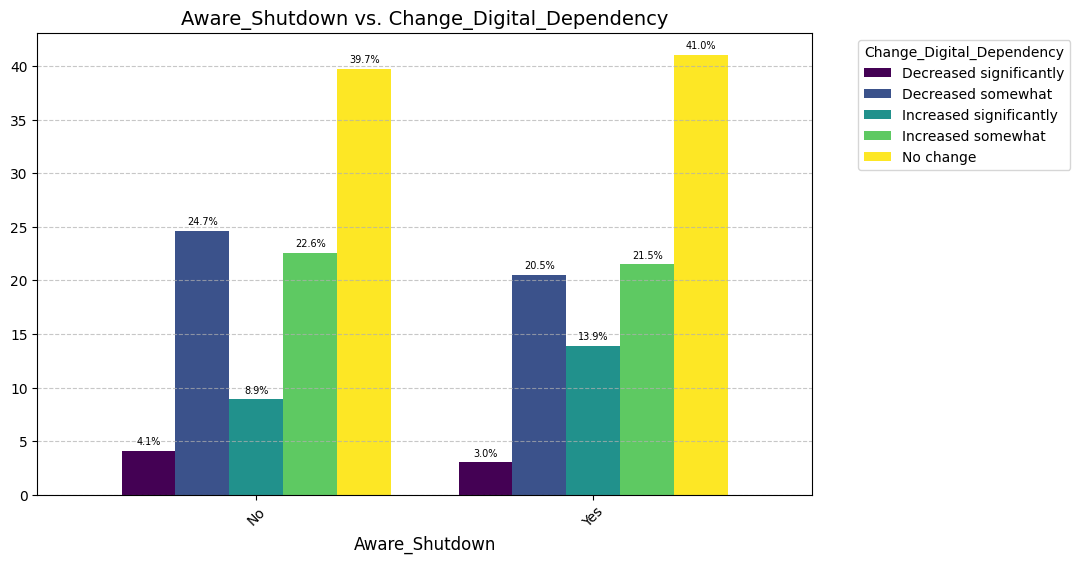

In [21]:
plt.figure(figsize=(10, 6))
ax = digital_dependency_analysis.plot(kind='bar', colormap='viridis', figsize=(10,6), width=0.8)
plt.title("Aware_Shutdown vs. Change_Digital_Dependency", fontsize=14)
plt.xlabel("Aware_Shutdown", fontsize=12)
plt.ylabel("", fontsize=12)
plt.legend(title="Change_Digital_Dependency", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_percentage_labels(ax)
plt.show()

5.2: Mental_Impact_of_S vs. Comm_Disruption_due_to_S

In [22]:
mental_health_vs_comm = pd.crosstab(df["Mental_Impact_of_S"], df["Comm_Disruption_due_to_S"], normalize="index") * 100
mental_health_vs_comm

Comm_Disruption_due_to_S,No disruption,Severely disrupted,Somewhat disrupted
Mental_Impact_of_S,,,
No change,8.823529,36.470588,54.705882
Significantly improved,13.636364,40.909091,45.454545
Significantly worsened,2.970297,69.306931,27.722772
Slightly improved,5.813953,49.418605,44.767442
Slightly worsened,2.790698,51.395349,45.813953


<Figure size 1000x600 with 0 Axes>

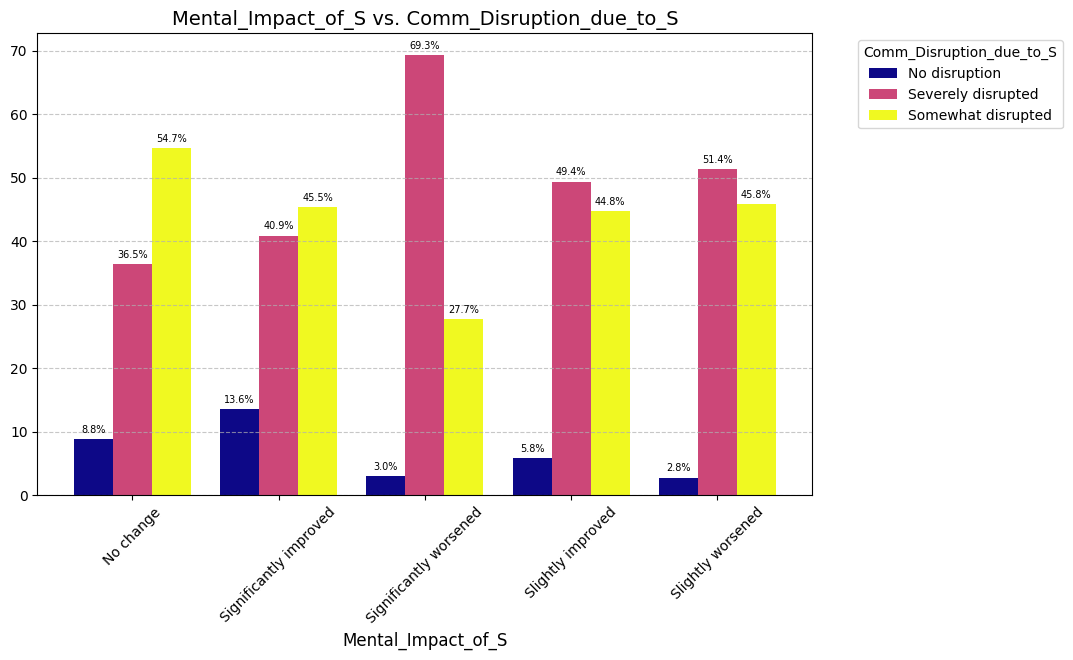

In [23]:
plt.figure(figsize=(10, 6))
ax = mental_health_vs_comm.plot(kind='bar', colormap='plasma', figsize=(10,6), width=0.8)
plt.title("Mental_Impact_of_S vs. Comm_Disruption_due_to_S", fontsize=14)
plt.xlabel("Mental_Impact_of_S", fontsize=12)
plt.ylabel("", fontsize=12)
plt.legend(title="Comm_Disruption_due_to_S", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_percentage_labels(ax)
plt.show()

5.3: Protest_Hindrance_AG vs. CORS_on_National_Stability

In [24]:
protest_vs_stability = pd.crosstab(df["Protest_Hindrance_AG"], df["CORS_on_National_Stability"], normalize="index") * 100
protest_vs_stability.T

Protest_Hindrance_AG,A little,Completely,Moderately,Not at all
CORS_on_National_Stability,,,,
Improved stability,21.159420,6.466513,7.453416,13.772455
Increased unrest and instability,41.739130,66.743649,62.111801,47.305389
No effect on stability,14.202899,7.621247,8.695652,10.179641
Not sure,17.101449,6.235566,11.801242,13.173653
Potential for a government collapse,5.797101,12.933025,9.937888,15.568862


<Figure size 1000x600 with 0 Axes>

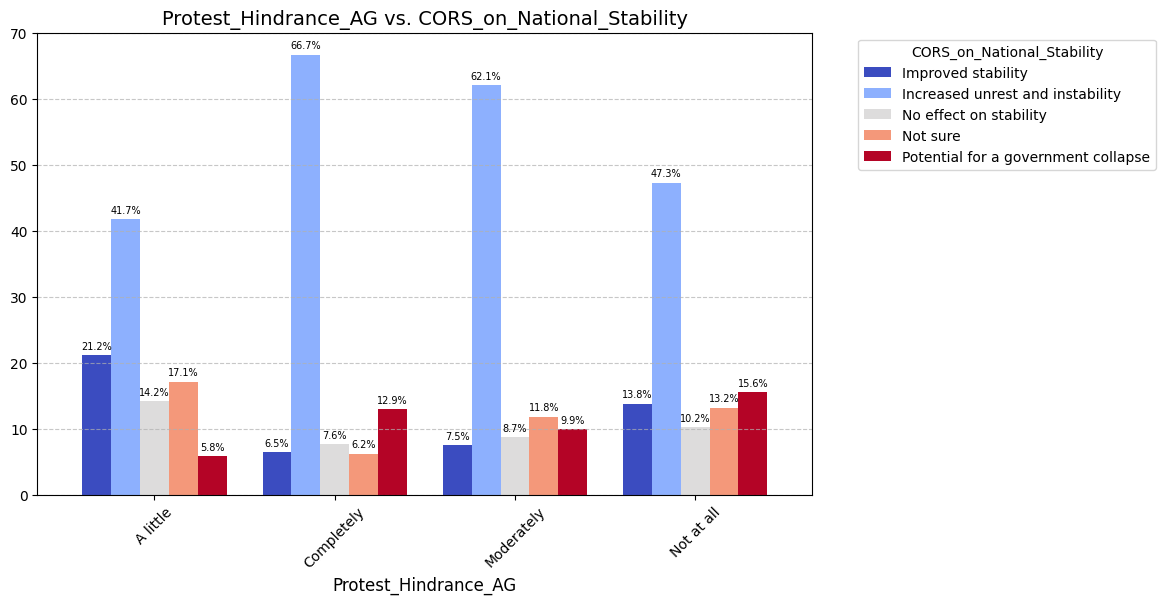

In [25]:
plt.figure(figsize=(10, 6))
ax = protest_vs_stability.plot(kind='bar', colormap='coolwarm', figsize=(10,6), width=0.8)
plt.title("Protest_Hindrance_AG vs. CORS_on_National_Stability", fontsize=14)
plt.xlabel("Protest_Hindrance_AG", fontsize=12)
plt.ylabel("", fontsize=12)
plt.legend(title="CORS_on_National_Stability", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_percentage_labels(ax)
plt.show()

5.4: Future_Civic_Engagement_if_ASO vs. Democracy_Perception_if_SDOA

In [26]:
civic_vs_democracy = pd.crosstab(df["Future_Civic_Engagement_if_ASO"], df["Democracy_Perception_if_SDOA"], normalize="index") * 100
civic_vs_democracy.T

Future_Civic_Engagement_if_ASO,Definitely no,Definitely yes,Not sure,Probably no,Probably yes
Democracy_Perception_if_SDOA,,,,,
More activism against the government,18.333333,18.765432,13.567839,22.077922,19.877676
More distrust in government actions,48.333333,51.851852,54.773869,57.142857,48.929664
More trust in government actions,11.666667,8.888889,4.020101,6.493506,4.892966
No change,13.333333,11.851852,6.030151,5.194805,12.844037
Not sure,8.333333,8.641975,21.608040,9.090909,13.455657


<Figure size 1000x600 with 0 Axes>

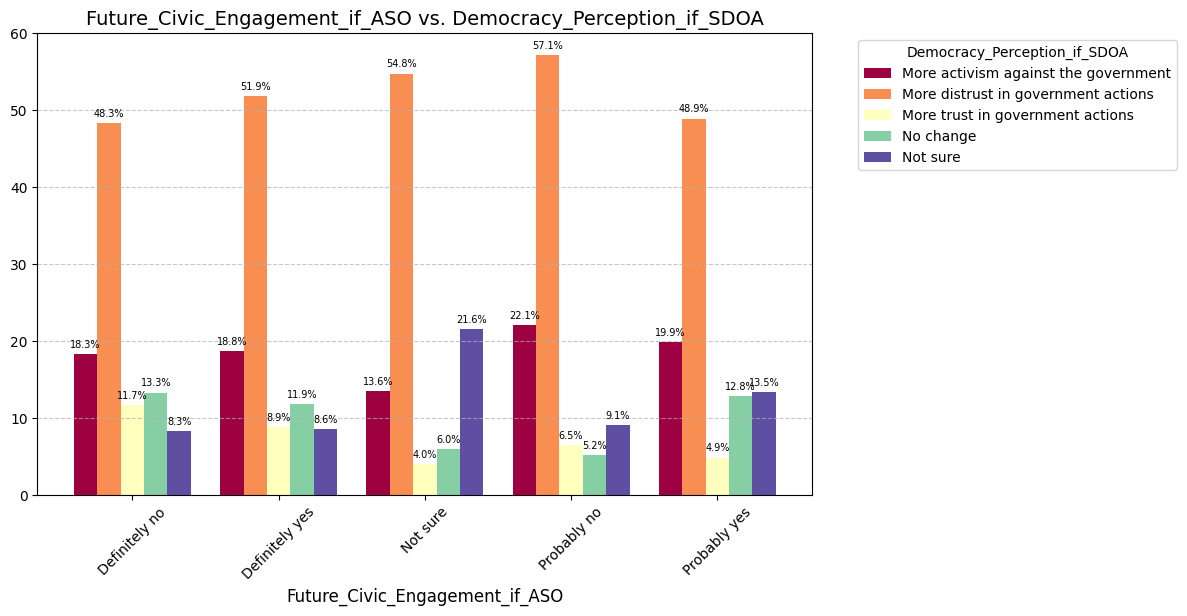

In [27]:
plt.figure(figsize=(10, 6))
ax = civic_vs_democracy.plot(kind='bar', colormap='Spectral', figsize=(10,6), width=0.8)
plt.title("Future_Civic_Engagement_if_ASO vs. Democracy_Perception_if_SDOA", fontsize=14)
plt.xlabel("Future_Civic_Engagement_if_ASO", fontsize=12)
plt.ylabel("", fontsize=12)
plt.legend(title="Democracy_Perception_if_SDOA", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_percentage_labels(ax)
plt.show()

5.5: News_Reliance_on_Internet_BS vs. Democracy_Perception_if_SDOA

In [28]:
news_vs_democracy = pd.crosstab(df["News_Reliance_on_Internet_BS"], df["Democracy_Perception_if_SDOA"], normalize="index") * 100
news_vs_democracy.T

News_Reliance_on_Internet_BS,Not reliant at all,Slightly reliant,Very reliant
Democracy_Perception_if_SDOA,,,
More activism against the government,12.820513,13.527397,22.791519
More distrust in government actions,34.188034,47.431507,60.777385
More trust in government actions,17.948718,6.849315,3.356890
No change,21.367521,13.356164,4.063604
Not sure,13.675214,18.835616,9.010601


<Figure size 1000x600 with 0 Axes>

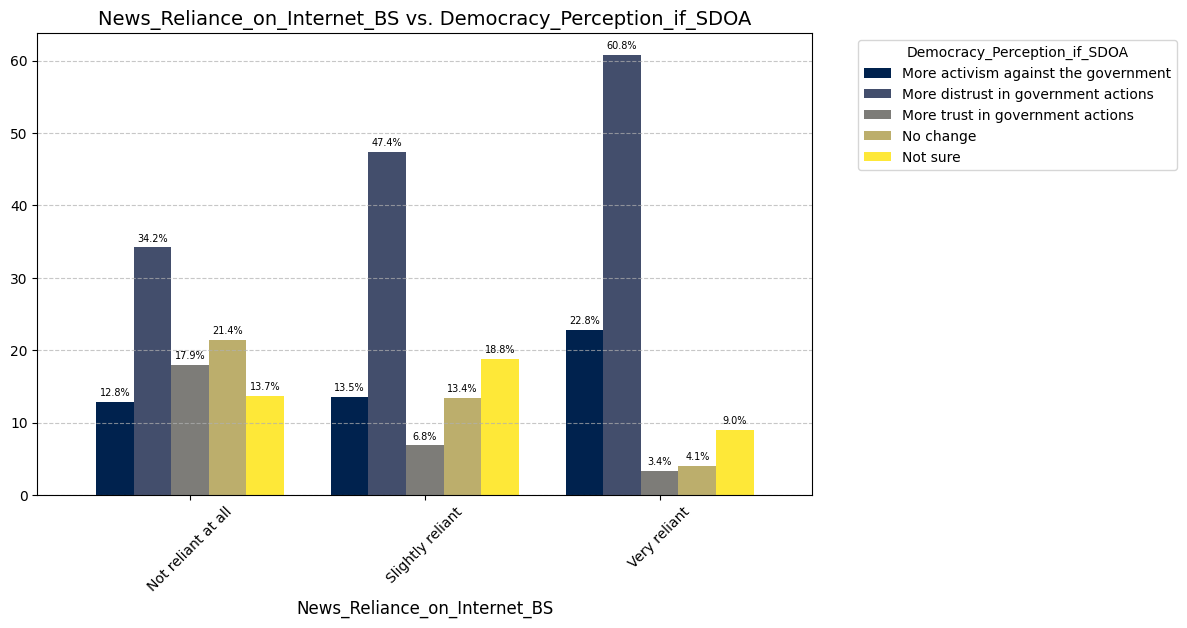

In [29]:
plt.figure(figsize=(10, 6))
ax = news_vs_democracy.plot(kind='bar', colormap='cividis', figsize=(10,6), width=0.8)
plt.title("News_Reliance_on_Internet_BS vs. Democracy_Perception_if_SDOA", fontsize=14)
plt.xlabel("News_Reliance_on_Internet_BS", fontsize=12)
plt.ylabel("", fontsize=12)
plt.legend(title="Democracy_Perception_if_SDOA", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_percentage_labels(ax)
plt.show()

5.6: Social_Media_Usage_Change_AS vs. Protest_Hindrance_AG

In [30]:
social_vs_protest = pd.crosstab(df["Social_Media_Usage_Change_AS"], df["Protest_Hindrance_AG"], normalize="index") * 100
social_vs_protest

Protest_Hindrance_AG,A little,Completely,Moderately,Not at all
Social_Media_Usage_Change_AS,,,,
Decreased somewhat,28.625954,30.916031,27.099237,13.358779
Increased significantly,32.352941,35.294118,18.235294,14.117647
Increased somewhat,34.567901,27.572016,25.514403,12.345679
Stayed the same,22.600000,36.800000,26.400000,14.200000
Stopped completely,19.565217,44.565217,28.260870,7.608696


<Figure size 1000x600 with 0 Axes>

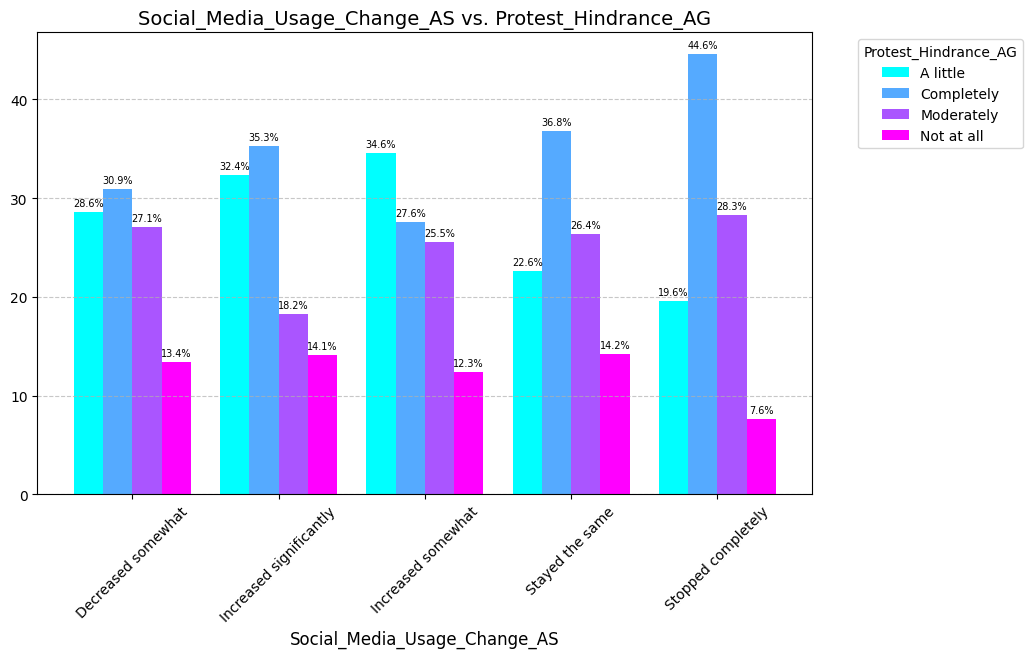

In [31]:
plt.figure(figsize=(10, 6))
ax = social_vs_protest.plot(kind='bar', colormap='cool', figsize=(10,6), width=0.8)
plt.title("Social_Media_Usage_Change_AS vs. Protest_Hindrance_AG", fontsize=14)
plt.xlabel("Social_Media_Usage_Change_AS", fontsize=12)
plt.ylabel("", fontsize=12)
plt.legend(title="Protest_Hindrance_AG", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_percentage_labels(ax)
plt.show()

5.7: Internet_Reliance_BS vs. Future_Civic_Engagement_if_ASO

In [32]:
internet_vs_civic = pd.crosstab(df["Internet_Reliance_BS"], df["Future_Civic_Engagement_if_ASO"], normalize="index") * 100
internet_vs_civic

Future_Civic_Engagement_if_ASO,Definitely no,Definitely yes,Not sure,Probably no,Probably yes
Internet_Reliance_BS,,,,,
A little,2.491103,35.587189,27.046263,6.049822,28.825623
Extremely,5.776173,31.768953,32.490975,4.693141,25.270758
Moderately,5.030488,30.487805,32.317073,6.707317,25.457317
Not at all,7.547170,32.075472,37.735849,5.660377,16.981132


<Figure size 1000x600 with 0 Axes>

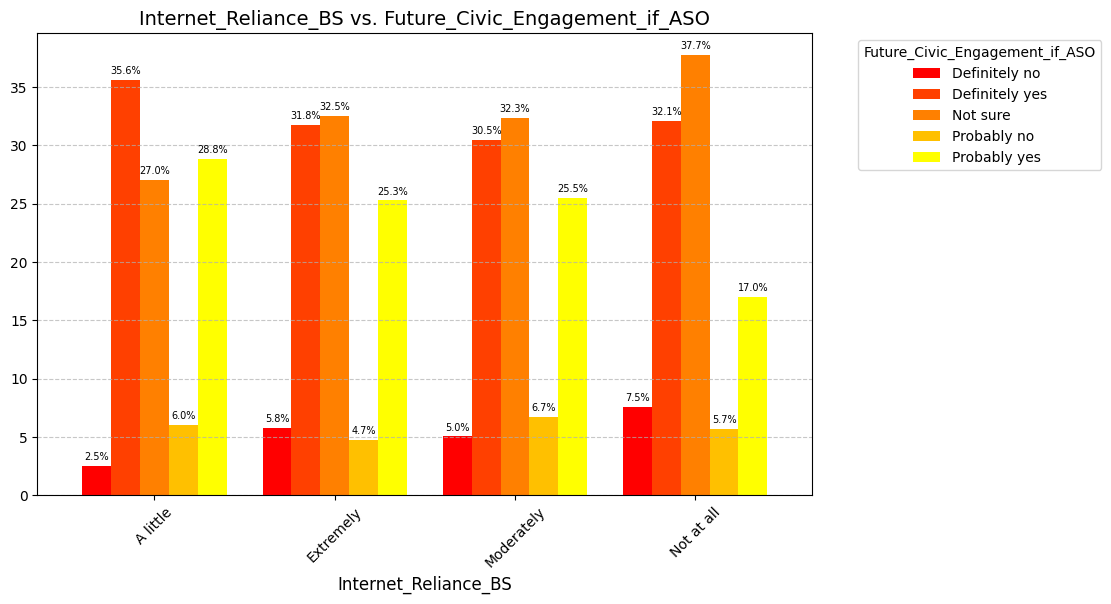

In [33]:
plt.figure(figsize=(10, 6))
ax = internet_vs_civic.plot(kind='bar', colormap='autumn', figsize=(10,6), width=0.8)
plt.title("Internet_Reliance_BS vs. Future_Civic_Engagement_if_ASO", fontsize=14)
plt.xlabel("Internet_Reliance_BS", fontsize=12)
plt.ylabel("", fontsize=12)
plt.legend(title="Future_Civic_Engagement_if_ASO", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_percentage_labels(ax)
plt.show()

5.8: Primary_Communication_Mode_BS vs. Mental_Impact_of_S

In [34]:
comm_vs_mental = pd.crosstab(df["Primary_Communication_Mode_BS"], df["Mental_Impact_of_S"], normalize="index") * 100
comm_vs_mental

Mental_Impact_of_S,No change,Significantly improved,Significantly worsened,Slightly improved,Slightly worsened
Primary_Communication_Mode_BS,,,,,
Email,32.608696,8.695652,10.869565,23.913043,23.913043
In-person communication,31.250000,3.125000,15.625000,15.625000,34.375000
Phone calls,30.131004,2.620087,18.340611,20.087336,28.820961
Social media platforms,25.625000,1.145833,26.145833,11.458333,35.625000


<Figure size 1000x600 with 0 Axes>

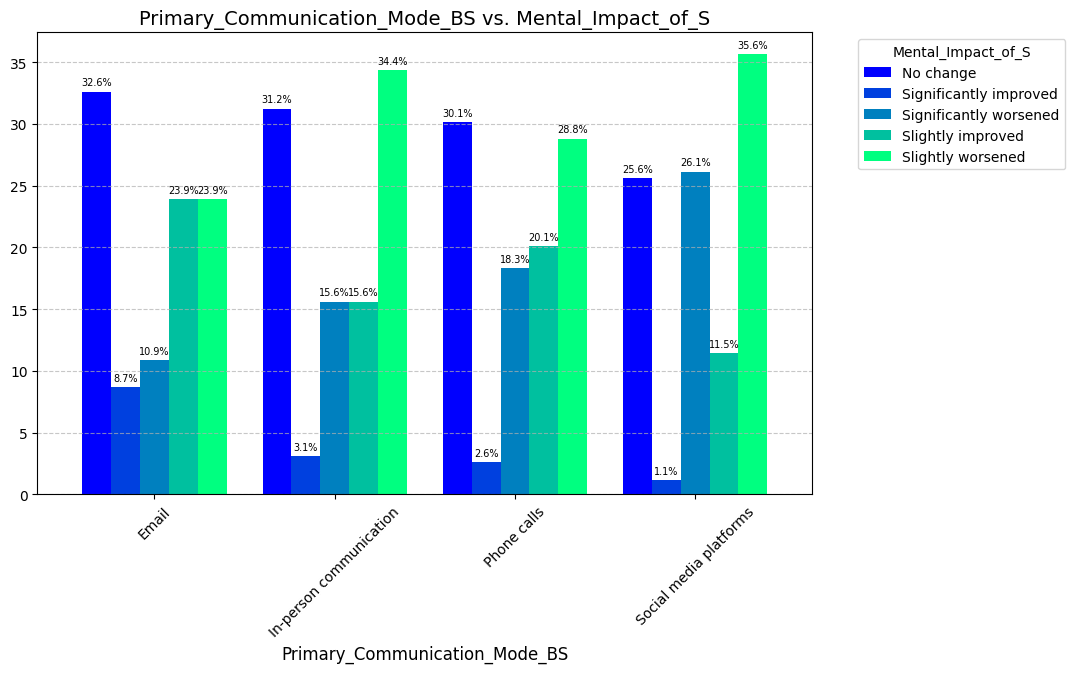

In [35]:
plt.figure(figsize=(10, 6))
ax = comm_vs_mental.plot(kind='bar', colormap='winter', figsize=(10,6), width=0.8)
plt.title("Primary_Communication_Mode_BS vs. Mental_Impact_of_S", fontsize=14)
plt.xlabel("Primary_Communication_Mode_BS", fontsize=12)
plt.ylabel("", fontsize=12)
plt.legend(title="Mental_Impact_of_S", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_percentage_labels(ax)
plt.show()